In [1]:
set.seed(1234567890)
dataset <- read.csv("creditset.csv")
head(dataset)


clientid,income,age,loan,LTI,default10yr
1,66155.93,59.01702,8106.5321,0.1225367512,0
2,34415.15,48.11715,6564.7450,0.1907515807,0
3,57317.17,63.10805,8020.9533,0.1399397997,0
4,42709.53,45.75197,6103.6423,0.1429105321,0
5,66952.69,18.58434,8770.0992,0.1309895000,1
6,24904.06,57.47161,15.4986,0.0006223321,0


In [2]:
trainset <- dataset[1:800, ] # extract a set to train the NN
testset <- dataset[801:2000, ] # select the test set


In [4]:
library(neuralnet)

Warning message:
"package 'neuralnet' was built under R version 3.6.3"

In [5]:
## build the neural network (NN)
creditnet <- neuralnet(default10yr ~ LTI + age, trainset, hidden = 4, lifesign = "minimal", linear.output = FALSE, threshold = 0.1)


hidden: 4    thresh: 0.1    rep: 1/1    steps:    7266	error: 0.79202	time: 2.15 secs


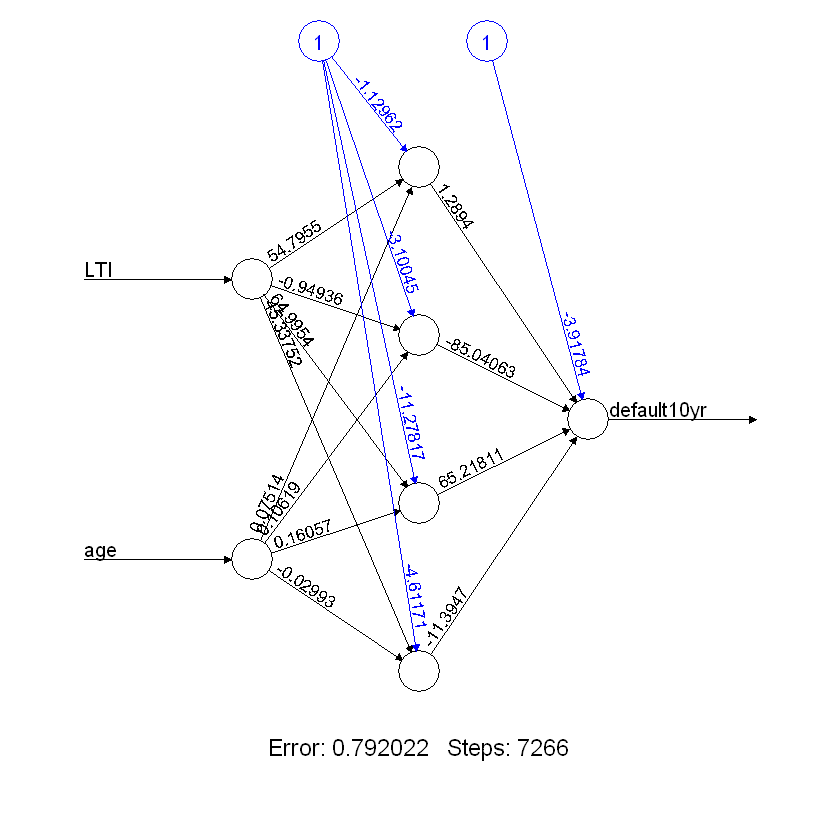

In [6]:
## plot the NN
plot(creditnet, rep = "best")


In [7]:
## test the resulting output
temp_test <- subset(testset, select = c("LTI", "age"))
creditnet.results <- compute(creditnet, temp_test)


In [8]:
head(temp_test)

,LTI,age
801,0.02306809,25.90645
802,0.13729705,40.77431
803,0.10456985,32.47351
804,0.15985046,53.22813
805,0.11161430,46.47915
806,0.11489364,47.12737


In [9]:
results <- data.frame(actual = testset$default10yr, prediction = creditnet.results$net.result)
results[100:115, ]
results$prediction <-round(results$prediction) # round to improve reading
results[100:115, ]


,actual,prediction
900,0,1.596485e-27
901,0,6.516287e-27
902,0,1.640440e-11
903,1,1.000000e+00
904,0,1.381078e-18
905,0,5.396363e-17
906,0,2.345923e-20
907,1,9.581420e-01
908,0,2.499230e-01
909,0,7.044361e-16


,actual,prediction
900,0,0
901,0,0
902,0,0
903,1,1
904,0,0
905,0,0
906,0,0
907,1,1
908,0,0
909,0,0
